In [1]:
#house price

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

In [8]:
train_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


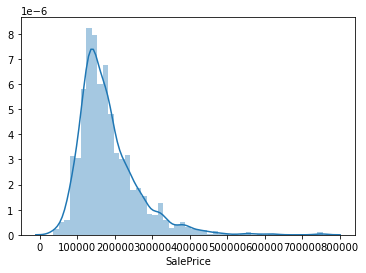

In [24]:
sns.distplot(train_data['SalePrice'])

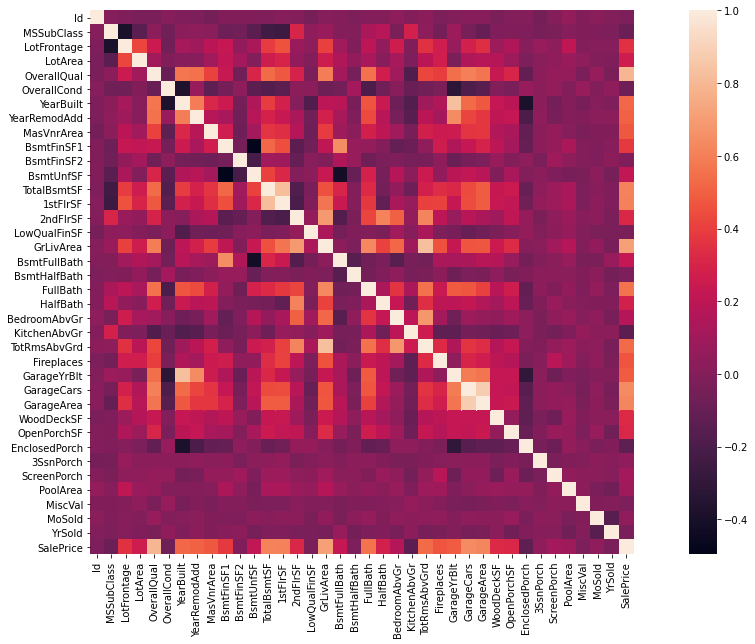

In [28]:
# 获取相关性矩阵
corrmat = train_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, square=True)

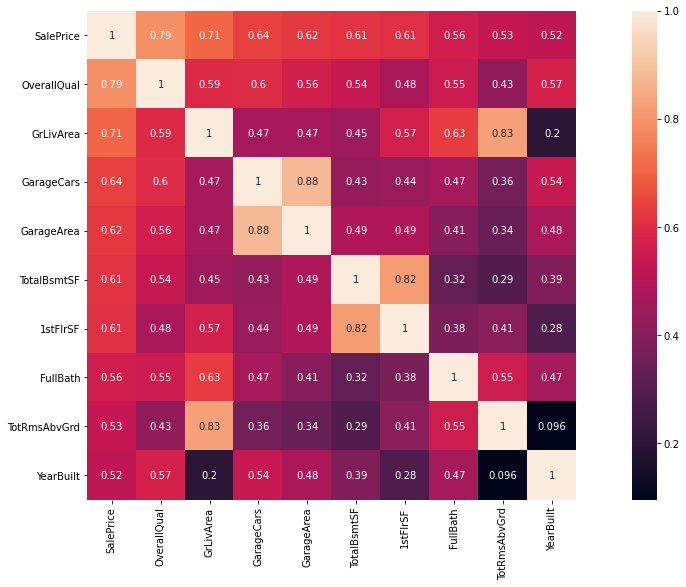

In [45]:
k = 10

col = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
cm = np.corrcoef(train_data[col].values.T)

plt.figure(figsize=(20,9))
sns.heatmap(cm ,annot= True, square= True, xticklabels= col.values, yticklabels= col.values)


In [ ]:
figure=plt.figure()
sns.pairplot(x_vars=['OverallQual','GrLivArea', 'YearBuilt','TotalBsmtSF'],y_vars=['SalePrice'],data=train_data,dropna=True)
plt.show()

In [ ]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [ ]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    train_data[x] = label.fit_transform(train_data[x])
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [ ]:
k  = 10 # 关系矩阵中将显示10个特征
# 获取10个特征的标签
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 9))
# annot 是否在格子上显示数字
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [ ]:
# 获取数据
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = train_data[cols].values
y = train_data['SalePrice'].values

X_train = preprocessing.StandardScaler().fit_transform(x)
y_train = train_data['SalePrice']

# x_scaled = preprocessing.StandardScaler().fit_transform(x)
# y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
# X_train,X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [ ]:
clfs = {
    'svm':svm.SVR(), 
    'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
    'BayesianRidge':linear_model.BayesianRidge()
}

param_grid_svr = {
    'kernel' : ['rbf','sigmod','linear'], 
}


param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

param_grid_br = {
    'n_iter': [300, 500],
}

svr = svm.SVR()
svr_grad = GridSearchCV(svr, param_grid_svr,n_jobs=25, cv=10, scoring = 'r2',verbose=1)
svr_grad.fit(X_train, y_train)
print(svr_grad.best_estimator_)
print(svr_grad.best_score_)
print('=======================================')


rf = RandomForestRegressor(n_estimators=400)
rf_grad = GridSearchCV(rf, param_grid_rf,n_jobs=25, cv=10, scoring = 'r2',verbose=1)
rf_grad.fit(X_train, y_train)
print(rf_grad.best_estimator_)
print(rf_grad.best_score_)
print('=======================================')

br = linear_model.BayesianRidge()
br_grad = GridSearchCV(br, param_grid_br,n_jobs=25, cv=10, scoring = 'r2',verbose=1)
br_grad.fit(X_train, y_train)
print(br_grad.best_estimator_)
print(br_grad.best_score_)
print('=======================================')

# rf_cls_grid = model_selection.GridSearchCV(rf_cls, param_grid, n_jobs=25, cv=10, scoring = 'roc_auc',verbose=1)
# rf_cls_grid.fit(train_data_x, train_data_y)

# for clf in clfs:
#     try:
#         clf_grad = GridSearchCV(clfs[clf], param_grids[clf],n_jobs=25, cv=10, scoring = 'neg_mean_squared_error',verbose=1)
#         clf_grad.fit(X_train, y_train)
#         # clfs[clf].fit(X_train, y_train)
#         # y_pred = clfs[clf].predict(X_test)
#         y_pred = clf_grad(X_test)
#         print(clf + " cost:" + str(np.sum(abs(y_pred-y_test))/len(y_pred)) )
#     except Exception as e:
#         print(clf + " Error:")
#         print(str(e))

In [ ]:
from xgboost import XGBRegressor


xgb_param_test = {
    'n_estimators': [300,600,900],
    'max_depth': [ 3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.1]
    # 'min_child_weight': [1, 3, 10],
    # 'max_delta_step': [0, 0.3, 1, 3],
    # 'subsample': [0.6, 0.8, 0.95],
    # 'colsample_bytree': [0.5,0.7, 0.9],
    # 'reg_alpha': [0, 0.5, 1],
    # 'reg_lambda': [0.2, 0.6, 1],
    # 'scale_pos_weight': [0.2, 0.6, 1]
}

xgbreg = XGBRegressor()
xgbreg_grad = GridSearchCV(xgbreg, xgb_param_test,n_jobs=25, scoring = 'r2',verbose=1)
xgbreg_grad.fit(X_train, y_train)
print(xgbreg_grad.best_estimator_)
print(xgbreg_grad.best_score_)
print('=======================================')

In [ ]:
data_test = pd.read_csv('./dataset/test.csv')
# data_test[cols].isnull().sum()
data_test['GarageCars'].fillna(data_test['GarageCars'].mean(), inplace=True)
data_test['TotalBsmtSF'].fillna(data_test['TotalBsmtSF'].mean(), inplace=True)
data_test[cols].isnull().sum()

In [ ]:
test_x = data_test[cols]
x_scaled = preprocessing.StandardScaler().fit_transform(test_x)

In [ ]:

y_te_pred = xgbreg_grad.predict(x_scaled)

print(y_te_pred.shape)
print(test_x.shape)


In [ ]:
data_test['SalePrice'] = y_te_pred
res = data_test[['Id', 'SalePrice']]
res.head(10)


In [ ]:
res.to_csv('./submit/baseline_submit4.csv', index=False)